# This notebook we will compare the eCLIP density on genes with HepG2 RNA stability data
This allows us to generate hypothesis about RBP function - whether it stabilize or destabilize RNA?

In [1]:
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import sys
sys.path.append('/home/hsher/Metadensity/scripts')
from dataloader import *

Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


# Read RNA stability file

In [2]:
rep1=pd.read_csv('GSE90684_shNS_IGF2BPs_RNA_half_life_rep1.txt', sep = '\t')
rep2=pd.read_csv('GSE90684_shNS_IGF2BPs_RNA_half_life_rep2.txt', sep = '\t')
bothreps=rep2.merge(rep1, left_on = 'GeneName', right_on='GeneName')
# remove string
bothreps=bothreps.loc[bothreps['shNS_half_life_rep1']!='#DIV/0!']
bothreps['stability_group']=pd.qcut(bothreps['shNS_half_life_rep1'].astype(float), q = 10, retbins = False, labels = False)

In [3]:
# map gene name to transcript id
name_to_id = {}
for t in transcript:
    name_to_id[t.attrs['gene_name']]=t.attrs['ID']

In [4]:
bothreps['gene_id']=bothreps['GeneName'].map(name_to_id)

# Another file

In [5]:
data2=pd.read_csv('GSE121949_mRNA_half-life.txt', sep='\t')
data2['stability_group']=pd.qcut(data2['shCtrl_hour'].astype(float), q = 5, retbins = False, labels = False)
data2['gene_id']=data2['symbol'].map(name_to_id)

In [6]:
def by_stability_group(rbp, cell_line='HepG2', thres=100, df = data2, col='shCtrl_hour'):

    thres = 100
    
    try:
        e = eCLIP.from_series(encode_data.loc[(encode_data['RBP']==rbp) & (encode_data['Cell line']==cell_line)].iloc[0], single_end = False)
    except:
        e = eCLIP.from_series(encode4_data.loc[(encode4_data['RBP']==rbp) & (encode4_data['Cell line']==cell_line)].iloc[0], single_end = True)
    transcripts_with_reads = e.enough_transcripts(thres = thres)
    
    print(f'NUMBER OF TRANSCRIPT WITh {thres} reads: {len(transcripts_with_reads)}')
    all_meta = []

    for name, group in df.groupby(by = 'stability_group'):
        
        maxh = group[col].max()
        minh = group[col].min()
        
        gene_ids = group['gene_id']

        enough_ids = transcripts_with_reads.intersection(set(gene_ids))

        print(len(enough_ids))
        
        m=Metadensity(e, name=e.name+f'_half_life={minh}-{maxh}h', transcript_ids = list(enough_ids),  background_method = 'relative information', normalize = False)
        m.get_density_array()

        all_meta.append(m)

    return all_meta
    

## Compare upregulated genes (logFC > 1) and downregulated genes (logFC <1)'s binding

In [7]:
from collections import defaultdict
def get_color_dict(all_meta):
    color_dict = defaultdict(lambda: 'seagreen')
    color_dict[rbp+'_upreg'] = 'tomato'
    color_dict[rbp+'_downreg'] = 'royalblue'
    color_dict[rbp+'_nochange'] = 'grey'
    return color_dict

In [75]:
data2.groupby(by = 'stability_group')['shCtrl_hour'].median()

stability_group
0     2.342728
1     3.872046
2     6.020903
3    10.223952
4    26.327854
Name: shCtrl_hour, dtype: float64

NUMBER OF TRANSCRIPT WITh 100 reads: 5263
439
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
493
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
462
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
476
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
512
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


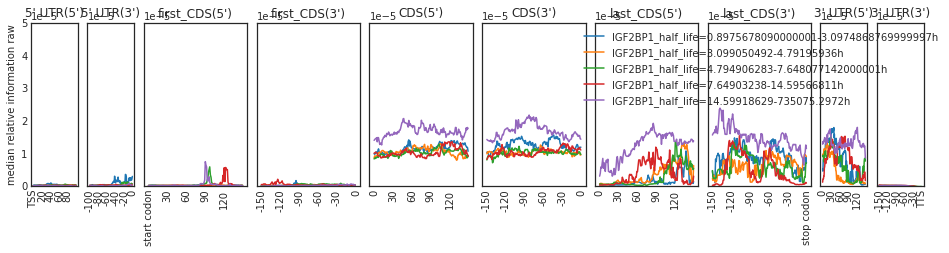

In [89]:
# IGF2BPs promote the stability and storage of their target mRNAs (e.g., MYC) in an m6A-depedent manner under normal and stress conditions and thus affect gene expression output
# IGFBP1 binding is associated with higher half-life
all_meta=by_stability_group(rbp='IGF2BP1')
f = plot_mean_density(all_meta, plot_std = False, stat = 'median', ymax = 0.00005, alpha = 0.3, features_to_show = protein_coding)

In [87]:
all_meta

NUMBER OF TRANSCRIPT WITh 100 reads: 8173
660
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
698
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
688
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
715
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
769
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


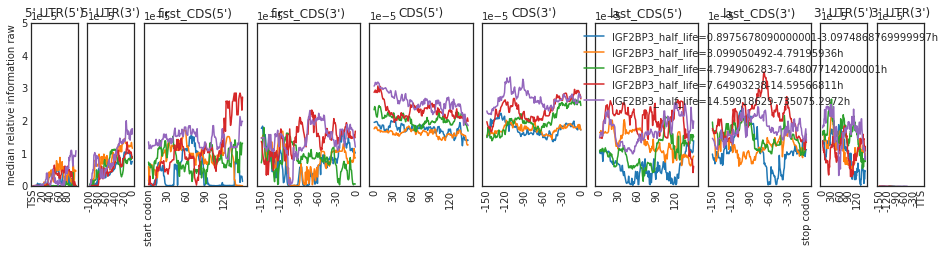

In [90]:
# IGF2BPs promote the stability and storage of their target mRNAs (e.g., MYC) in an m6A-depedent manner under normal and stress conditions and thus affect gene expression output
# IGFBP1 binding is associated with higher half-life
all_meta=by_stability_group(rbp='IGF2BP3')
f = plot_mean_density(all_meta, plot_std = False, stat = 'median', ymax = 0.00005, alpha = 0.3, features_to_show = protein_coding)

In [62]:
from metadensity.pos_enrich import *
group1_null, group1_meta = construct_distribution(all_meta[0].eCLIP, all_meta[0].metagene)

Done constructing an empirical null distribution from Input
Done constructing IP distribution


NUMBER OF TRANSCRIPT WITh 100 reads: 5522
479
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
492
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
474
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
512
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
554
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


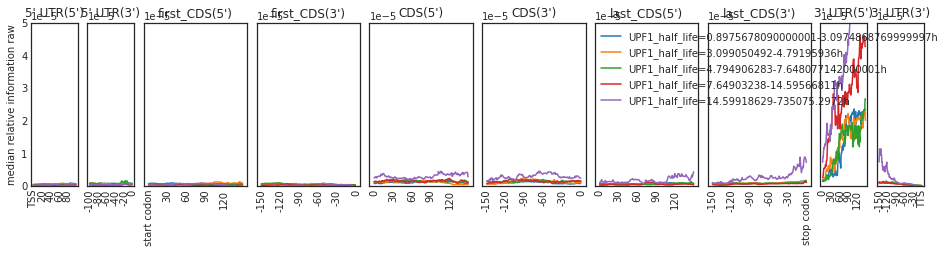

In [8]:
# IGF2BPs promote the stability and storage of their target mRNAs (e.g., MYC) in an m6A-depedent manner under normal and stress conditions and thus affect gene expression output
# IGFBP1 binding is associated with higher half-life
all_meta=by_stability_group(rbp='UPF1')
f = plot_mean_density(all_meta, plot_std = False, stat = 'median', ymax = 0.00005, alpha = 0.3, features_to_show = protein_coding)

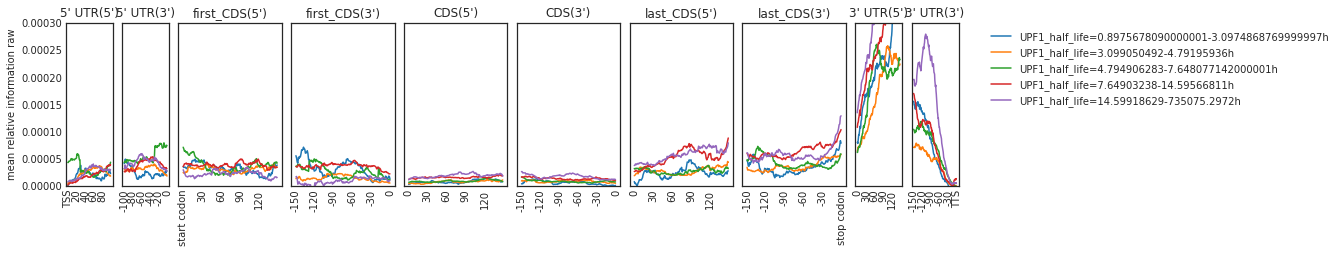

In [10]:
f = plot_mean_density(all_meta, plot_std = False, stat = 'mean', ymax = 0.0003, alpha = 0.3, features_to_show = protein_coding)

In [22]:
all_meta[0].metagene[t].densities['726']['rep1']['three_prime_UTR']

(array([ 6.27473245e-04,  6.27473245e-04,  7.52018270e-04, ...,
        -4.10652512e-05, -4.10652512e-05, -4.10652512e-05]),
 array([1.20895400e-03, 1.20895400e-03, 1.45804405e-03, ...,
        7.01721065e-05, 7.01721065e-05, 7.01721065e-05]))

In [23]:
all_meta[0].metagene[t].coverage

{'726': {'rep1': array([ 0.32701784, -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ]),
  'rep2': array([-0., -0., -0., ..., -0., -0., -0.]),
  'ctrl': array([-0., -0., -0., ..., -0., -0., -0.])}}

In [57]:
dens=[]
for i in range(len(all_meta)):

    group_t_den=[]
    for t in all_meta[i].metagene.keys():

        s=all_meta[i].metagene[t].coverage['726']['ctrl'].mean()
        group_t_den.append(s)
    dens.append(group_t_den)

Text(0.5, 1.0, 'Input')

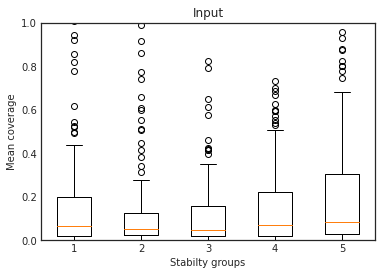

In [60]:
plt.boxplot(dens)
plt.ylim(0,1)
plt.ylabel('Mean coverage')
plt.xlabel('Stabilty groups')
plt.title('Input')

NUMBER OF TRANSCRIPT WITh 100 reads: 10530
783
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
847
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
914
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
920
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
932
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


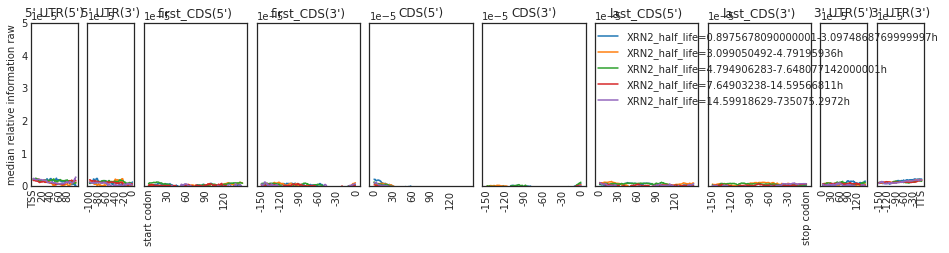

In [93]:
# IGF2BPs promote the stability and storage of their target mRNAs (e.g., MYC) in an m6A-depedent manner under normal and stress conditions and thus affect gene expression output
# IGFBP1 binding is associated with higher half-life
all_meta=by_stability_group(rbp='XRN2')
f = plot_mean_density(all_meta, plot_std = False, stat = 'median', ymax = 0.00005, alpha = 0.3, features_to_show = protein_coding)

NUMBER OF TRANSCRIPT WITh 100 reads: 9947
756
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
789
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
821
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
821
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
838
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


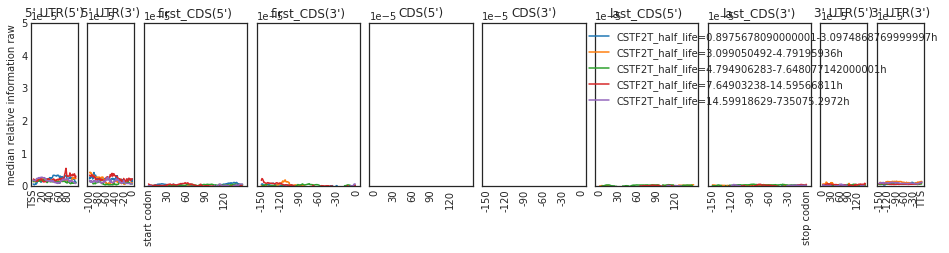

In [94]:
# IGF2BPs promote the stability and storage of their target mRNAs (e.g., MYC) in an m6A-depedent manner under normal and stress conditions and thus affect gene expression output
# IGFBP1 binding is associated with higher half-life
all_meta=by_stability_group(rbp='CSTF2T')
f = plot_mean_density(all_meta, plot_std = False, stat = 'median', ymax = 0.00005, alpha = 0.3, features_to_show = protein_coding)

In [8]:
from metadensity.pos_enrich import *

In [38]:
ddx6_metas.save_dee

'DDX6_upreg'

In [29]:
ks_up,p_up=KS_enrich(ddx6_metas[-1], ddx6_metas[0], bidir=True, sigma = 5)
ks_down_sub,p_down_sub=KS_enrich(ddx6_metas[-1], downsample_group(ddx6_metas[1], 36), bidir=True, sigma = 5)
ks_down,p_down=KS_enrich( ddx6_metas[-1], ddx6_metas[1], bidir=True, sigma = 5)

KeyboardInterrupt: 

In [34]:
from scipy.ndimage import gaussian_filter1d
def plot_auc_result(result, pval, ylabel='KS', smooth = True, fdr_thres = 0.1, features_to_show=generic_rna):
    ''' feed any enrichment results into her'''
    f,ax = generate_axis(nrows=1,features_to_show=features_to_show)
    for rbp in result.keys():
        for key in ax.keys():
            feat = key[0]
            align = key[1]
            mask=np.ma.masked_where(gaussian_filter1d(pval[rbp][key], sigma=5)>fdr_thres, 
                                    gaussian_filter1d(result[rbp][key], sigma = 5)
                                   )
            #print(mask)
            if smooth:
                ax[key].plot(mask, label = rbp)
                #ax[key].plot(result[rbp][key], label = rbp, marker = '.', alpha = 0.3)
            else:
                ax[key].plot(mask, label = rbp)
            if feat == 'first_exon' and align =='left':
                ax[key].set_ylabel(ylabel)
        ax[key].legend()

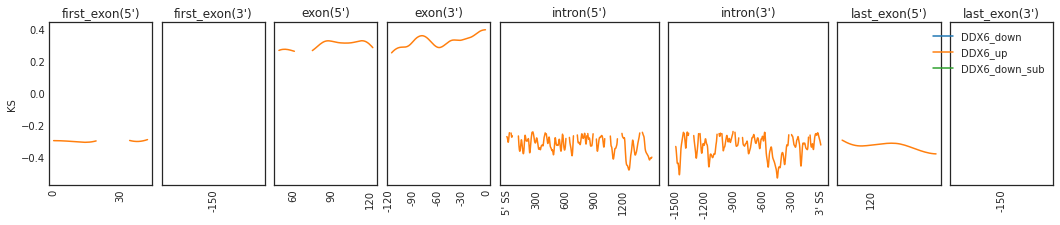

In [35]:
plot_auc_result({'DDX6_down': ks_down, 'DDX6_up': ks_up, 'DDX6_down_sub': ks_down_sub}, {'DDX6_down': p_down, 'DDX6_up': p_up, 'DDX6_down_sub': p_down_sub}, ylabel='KS', fdr_thres=0.05)

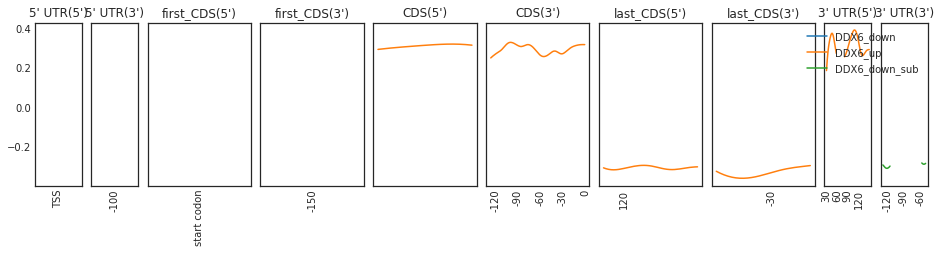

In [36]:
plot_auc_result({'DDX6_down': ks_down, 'DDX6_up': ks_up, 'DDX6_down_sub': ks_down_sub}, {'DDX6_down': p_down, 'DDX6_up': p_up, 'DDX6_down_sub': p_down_sub}, ylabel='KS', fdr_thres=0.05, features_to_show=protein_coding)

In [30]:
rbfox2_metas = main('HepG2', 'RBFOX2', filter_direct = False)

4080
# up reg: 0 # down reg: 432 background: 3648
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


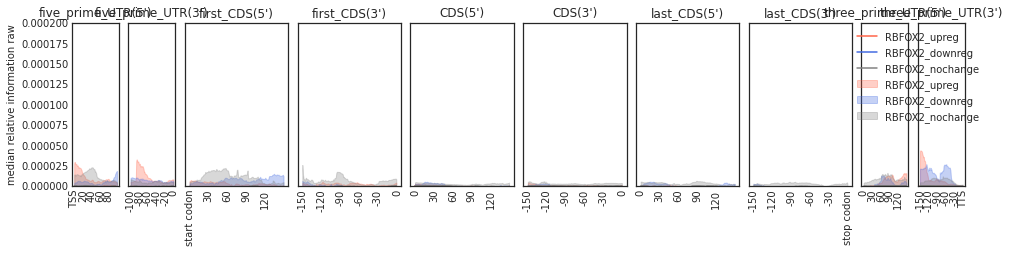

In [31]:
f = plot_mean_density(rbfox2_metas, plot_std = True, stat = 'median', ymax = 0.0002, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('RBFOX2'))

In [7]:
pabp_metas = main('K562', 'PABPC4', filter_direct = False)

4934
# up reg: 9 # down reg: 12 background: 4913
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


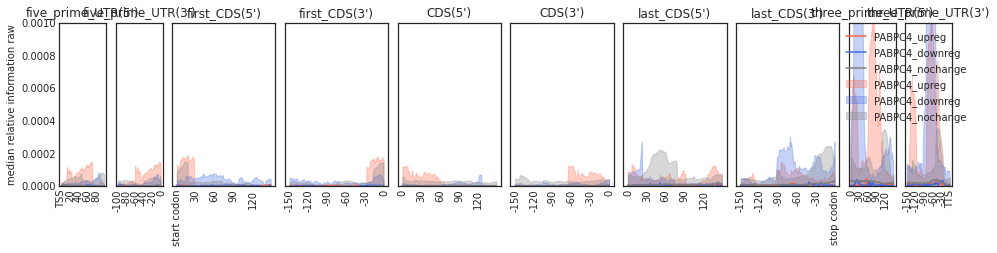

In [9]:
f = plot_mean_density(pabp_metas, plot_std = True, stat = 'median', ymax = 0.001, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('PABPC4'))

In [39]:
ddx_metas = main('HepG2', 'DDX3X', filter_direct = False)


4578
# up reg: 113 # down reg: 689 background: 3776
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


In [44]:
ddx_down_down = downsample_group(ddx_metas[1], 113)

In [8]:
ddx_metas[0].density_array['five_prime_UTR', 'left', 'rep1'].shape

(113, 100)

In [45]:
ddx_metas[1].density_array['five_prime_UTR', 'left', 'rep1'].shape

(200, 100)

In [46]:
ddx_down_down.density_array['five_prime_UTR', 'left', 'rep1'].shape

(113, 100)

In [19]:
from metadensity.pos_enrich import *

In [53]:
ks,p=KS_enrich(ddx_metas[0], ddx_metas[-1])

KeyboardInterrupt: 

In [10]:
import copy
def downsample_group(meta, size):
    ''' downsample metadensity object and plot'''
    features = meta.density_array.keys()
    original_size = meta.density_array[list(features)[0]].shape[0]
    
    # sample index
    selected_index = np.random.choice(original_size, size, replace = False)
    new_meta = copy.copy(meta)
    new_meta.density_array = copy.deepcopy(meta.density_array)
    
    for feat in features:
        new_meta.density_array[feat] = meta.density_array[feat][selected_index, :]
    new_meta.name = meta.name+'_downsample'
    return new_meta

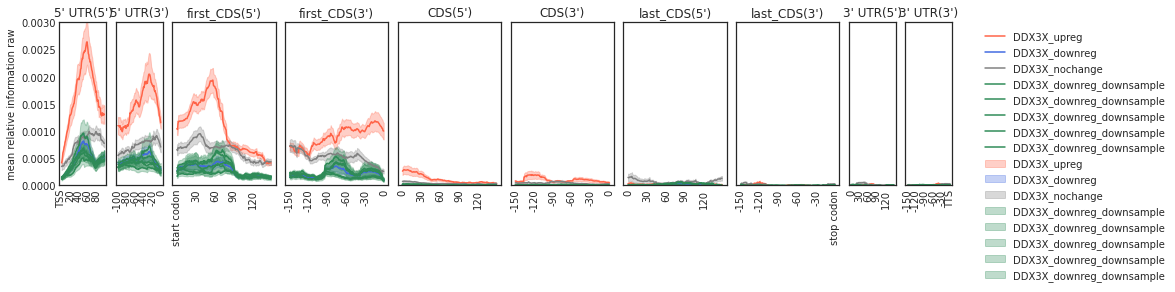

In [49]:

f = plot_mean_density(ddx_metas+[downsample_group(ddx_metas[1], 113) for i in range(5)], plot_std = True, stat = 'mean', ymax = 0.003, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('DDX3X'))

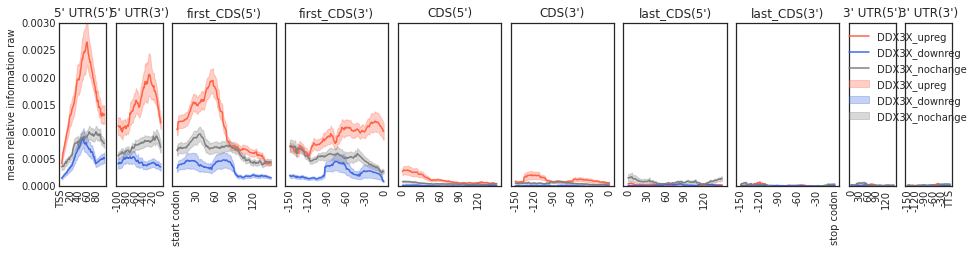

In [31]:

f = plot_mean_density(ddx_metas, plot_std = True, stat = 'mean', ymax = 0.003, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('DDX3X'))

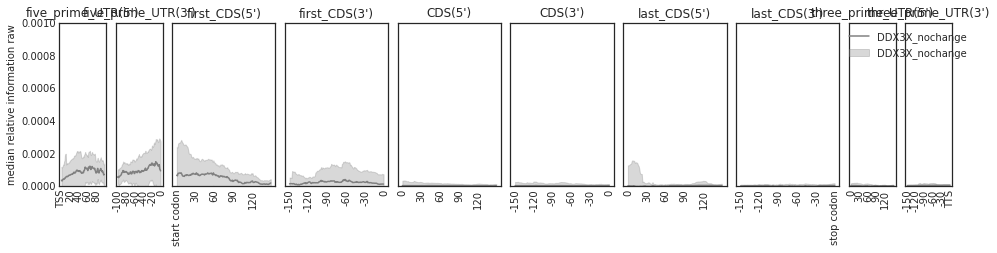

In [9]:

f = plot_mean_density([ddx_metas[-1]], plot_std = True, stat = 'median', ymax = 0.001, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('DDX3X'))

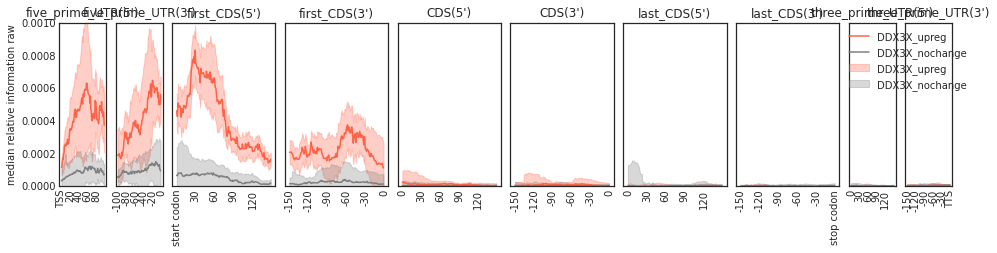

In [10]:

f = plot_mean_density([ddx_metas[0],ddx_metas[-1]], plot_std = True, stat = 'median', ymax = 0.001, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('DDX3X'))

In [13]:
exosc_metas = main('HepG2', 'EXOSC5', filter_direct = False)

1069
# up reg: 0 # down reg: 77 background: 992
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


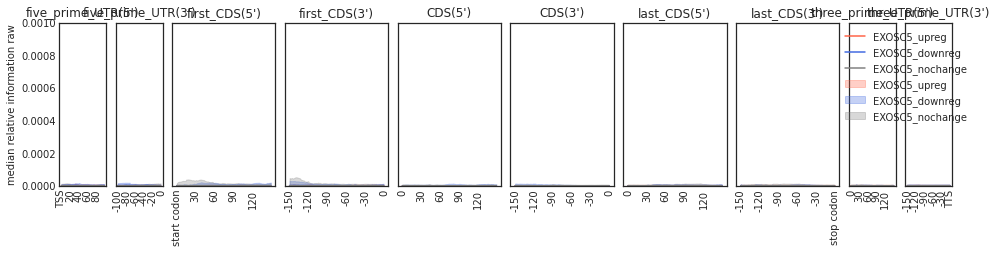

In [14]:

f = plot_mean_density(exosc_metas, plot_std = True, stat = 'median', ymax = 0.001, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('EXOSC5'))

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/plotd.py:154: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in m.eCLIP.rep_keys]), axis = 0)


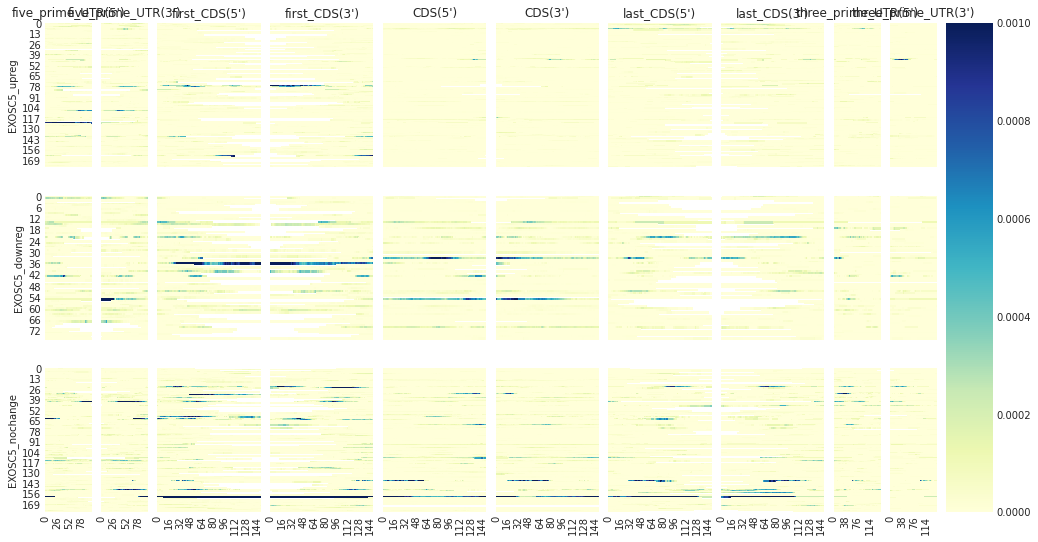

In [18]:
# individually
f = plot_rbp_map(exosc_metas, ymax = 0.001, alpha = 0.3, features_to_show = protein_coding)

### DDX3X bound transcript tend to be upregulated upon DDX KD
--> hypothesis: DDX3X kills RNA, so when DDX3X is gone, RNA survive and has a higher steady state concentration.

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/plotd.py:149: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in m.eCLIP.rep_keys]), axis = 0)


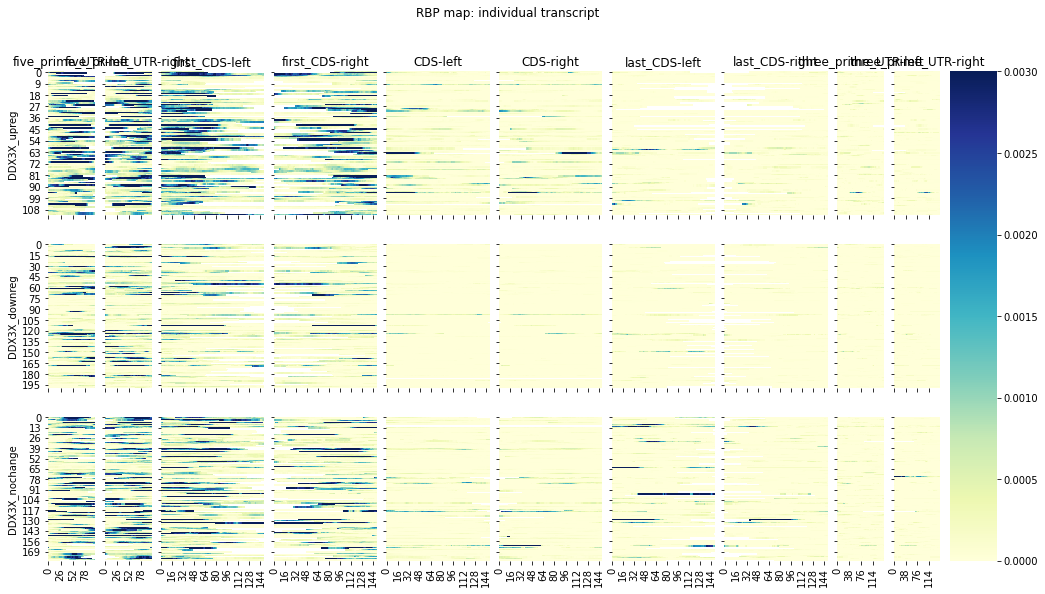

In [15]:
# individually
f = plot_rbp_map(ddx_metas, ymax = 0.003, alpha = 0.3, features_to_show = protein_coding)

# UPF1: helicase needed for non-sense mediated decay

In [11]:
upf_metas = main('HepG2', 'UPF1', filter_direct = False) 

3206
# up reg: 225 # down reg: 28 background: 2953
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


In [21]:
# show that std is large
def plot_mean_density(metas, ymax = 0.001, alpha = 0.3, plot_std = True, stat = 'mean', features_to_show = featnames, smooth = False, color_dict = None, mask = False):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig, ax_dict = generate_axis(nrows = 1,  features_to_show = features_to_show)

    
    #_ = [ax_dict[key].set_ylabel(stat + ' density') for key in ax_dict.keys() if features_to_show[0] in key and 'left' in key]
    _ = [ax_dict[key].set_ylim(ymax = ymax, ymin = 0) for key in ax_dict.keys() if features_to_show[0] in key]
    
    for m in metas:
        i=0
        if isinstance(m, Metatruncate):
            den_arr = m.density_array
        elif isinstance(m, Metadensity):
            den_arr = m.density_array
        elif isinstance(m, PosEnrichResult):
            if mask:
                den_arr = m.masked
            else:
                den_arr = m.stat
        else:
            print('Feeding wrong object {}. Only accept Metadensity or Metatruncate'.format(type(m)))

        for feat in features_to_show:
            for align in ['left', 'right']:

                ####### make replicate  together and mean #########
                density_concat = np.concatenate([den_arr[feat,align, r] for r in m.eCLIP.rep_keys], axis = 0)
                flen = feat_len_dict[feat]
                if align == 'left':
                    density_concat = density_concat[:, :flen]
                else:
                    density_concat = density_concat[:, -flen:]

                ####### calculating mean and median #########
                if stat == 'mean':
                    md = np.nanmean(density_concat, axis = 0)
                if stat == 'median':
                    md = np.nanmedian(density_concat, axis = 0)
                
                std = np.nanstd(density_concat, axis = 0)
                n = density_concat.shape[0]
                sem = std/np.sqrt(n)

                ####### get the right axis #########
                ax = ax_dict[feat, align, 'rep1']
                
                

                if smooth:
                    if color_dict:
                        ax.plot(gaussian_smooth(md), label = m.name, color = color_dict[m.name])
                    else:
                        ax.plot(gaussian_smooth(md), label = m.name)
                else:
                    if color_dict:
                        ax.plot(md, label = m.name, color = color_dict[m.name])
                    else:
                        ax.plot(md, label = m.name)
                    
                    if plot_std:
                        if color_dict:
                            ax.fill_between(np.arange(len(md)), md-sem, md+sem, label = m.name, alpha = alpha, color = color_dict[m.name])
                        else:
                            ax.fill_between(np.arange(len(md)), md-sem, md+sem, label = m.name, alpha = alpha)
                
                if align == 'left' and feat == features_to_show[0]:
                    if m.background_method == 'relative information':
                        ylbl = '{} relative information'.format(stat)
                    elif m.background_method == None:
                        ylbl = '{} IP'.format(stat)
                    else:
                        ylbl = '{} subtracted '.format(stat)
                    
                    if m.normalize:
                        ylbl += ' normalized density'
                    else:
                        ylbl += ' raw'
                    ax.set_ylabel(ylbl)
                
                
                    
                i+= 1
    ncol = math.ceil(len(metas)/10)
    plt.legend(ncol = ncol)
    
    
    #plt.suptitle('Pooled Density from Many Transcript')
    return fig

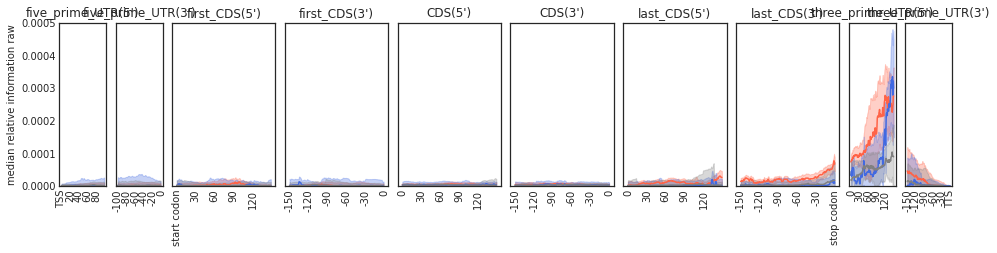

In [16]:
f = plot_mean_density(upf_metas, plot_std = True, stat = 'median', ymax = 0.0005, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('UPF1'))

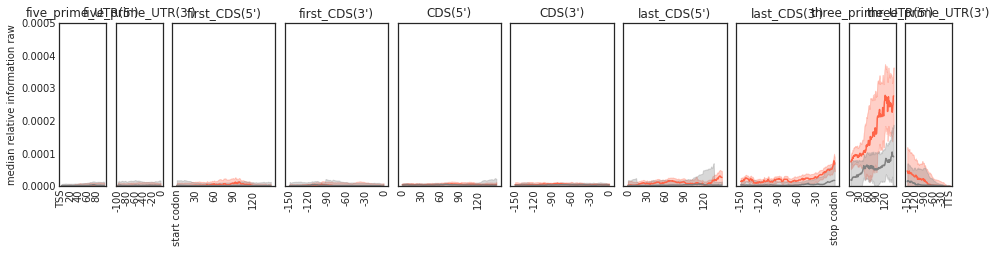

In [17]:
f = plot_mean_density([upf_metas[0], upf_metas[-1]], plot_std = True, stat = 'median', ymax = 0.0005, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('UPF1'))

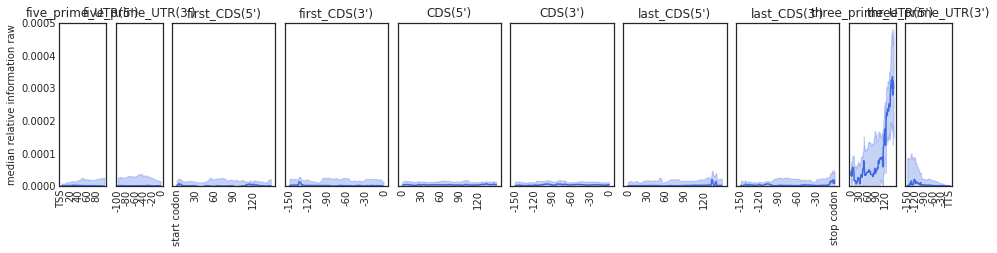

In [18]:
f = plot_mean_density([upf_metas[1]], plot_std = True, stat = 'median', ymax = 0.0005, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('UPF1'))

# XRN: 5'->3' exoribonuclease activity (By similarity).

In [15]:
xrn_metas= main('HepG2', 'XRN2', filter_direct = False)

7391
# up reg: 114 # down reg: 377 background: 6900
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


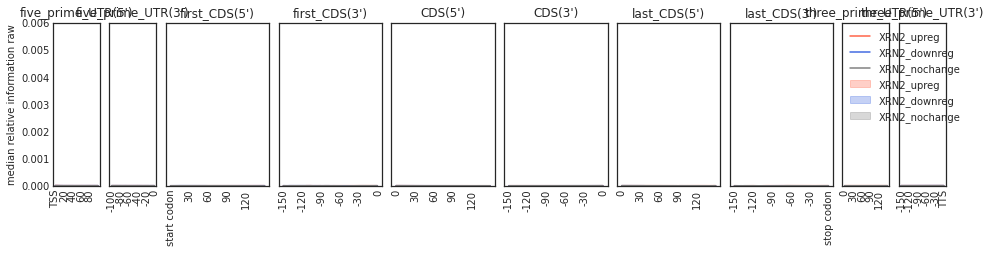

In [16]:
f = plot_mean_density(xrn_metas, plot_std = True, stat = 'median', ymax = 0.006, alpha = 0.3, features_to_show = protein_coding, color_dict = get_color_dict('XRN2'))

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/plotd.py:154: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in m.eCLIP.rep_keys]), axis = 0)


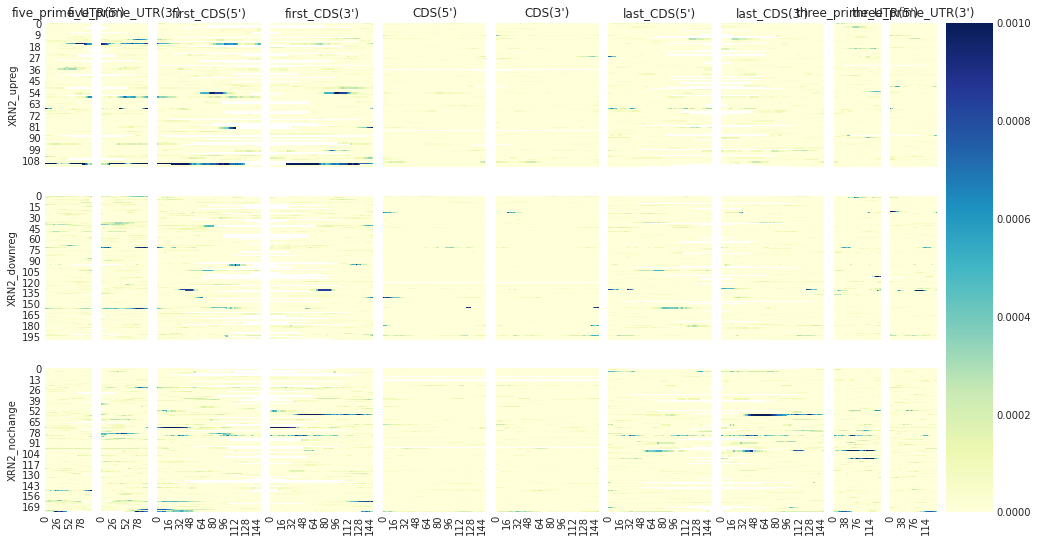

In [17]:
# individually
f = plot_rbp_map(xrn_metas, ymax = 0.001, alpha = 0.3, features_to_show = protein_coding)

# SSB: single strand binding protein that promotes RNA stability?

In [22]:
ssb_metas= main('HepG2', 'SSB', filter_direct = False)

5526
# up reg: 1022 # down reg: 156 background: 4348
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene
Using: /home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/data/hg38/gencode
Done building metagene


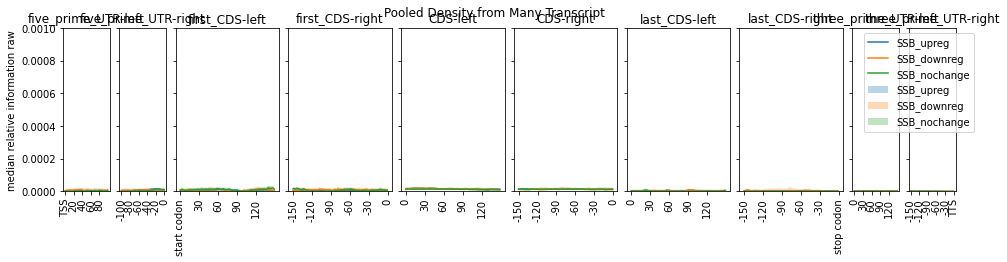

In [23]:
f = plot_mean_density(ssb_metas, plot_std = True, stat = 'median', ymax = 0.001, alpha = 0.3, features_to_show = protein_coding)